# Метод ближайших соседей

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Алгоритм классификации объекта:
 - Вычислить расстояние до каждого из объектов обучающей выборки
 - Отобрать $k$ объектов обучающей выборки, расстояние до которых минимально
 - Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей
 

Ленивость - вычисления начинаются только в момент классификации тестового примера.

Скорость - при большом количестве объектов в тесте, алгоритм будет долго работать для **каждого** предсказания.


Загрузим выборку:

In [2]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.5, random_state=16)

Применим knn:

In [3]:
knn = KNN()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [4]:
sample = X_test[0:1, ...]
knn.predict(sample)

array([1])

In [5]:
knn.predict_proba(sample)

array([[0. , 0.6, 0.4]])

Оценим accuracy предсказания:

In [6]:
accuracy_score(y_test, knn.predict(X_test))

0.9333333333333333

## Гиперпараметры
 - число соседей `n_neighbors`
 - метрика расстояния между объектами `metric`: "minkowski", "manhattan", "euclidean", "chebyshev" и другие

In [7]:
knn = KNN(n_neighbors=3)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.96

In [8]:
knn = KNN(n_neighbors=3, metric='manhattan')
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.9733333333333334

## Масштабирование
для корректного вычисления метрики необходимо масштабировать признаки

In [9]:
from sklearn.preprocessing import minmax_scale, maxabs_scale

In [10]:
train_size = X_train.shape[0]

In [11]:
X = np.vstack((X_train, X_test))
_ = maxabs_scale(X, copy=False)

knn = KNN(n_neighbors=3, metric='manhattan')
knn.fit(X[:train_size], y_train)
accuracy_score(y_test, knn.predict(X[train_size: ]))

0.9466666666666667

In [12]:
X = np.vstack((X_train, X_test))
_ = minmax_scale(X, copy=False)

knn = KNN(n_neighbors=3, metric='manhattan')
knn.fit(X[:train_size], y_train)
accuracy_score(y_test, knn.predict(X[train_size: ]))

0.9866666666666667

## Переобучение и недообучение 

In [13]:
knn = KNN(n_neighbors=1)
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.9333333333333333

In [14]:
knn = KNN(n_neighbors=X_train.shape[0])
knn.fit(X_train, y_train)
accuracy_score(y_test, knn.predict(X_test))

0.26666666666666666

## Веса соседей

`weights`: "uniform" (все веса равны), "distance" (вес обратно пропорционален расстоянию до тестового примера) или другая определенная пользователем функция.

In [15]:
X = np.vstack((X_train, X_test))
_ = minmax_scale(X, copy=False)

knn = KNN(weights='distance')
knn.fit(X[:train_size], y_train)
accuracy_score(y_test, knn.predict(X[train_size: ]))

0.9866666666666667

### Оптимизация kNN
Предположим, что каждый объект имеет $d$ признаков. Обучающая выборка состоит из $N$ примеров, а тестовая - из $M$. Давайте попробуем оценить сложность какого-нибудь простого варианта алгоритма $k$ ближайших соседей. Для простоты возьмём евклидову метрику.

Заметим, что для обучающей и тестовой выборок с 10000 примеров в каждой и 10 признаками на объект, алгоритм может работать достаточно долго. Тем не менее, можно ускорить метод $k$ ближайших соседей засчёт некоторых свойств метрики. Подробнее про то, как это работает можно посмотреть <a href="https://www.youtube.com/watch?v=UUm4MOyVTnE">здесь</a>.

 - `algorithm`: "brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем - расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей. В случае указания параметра "auto" подходящий способ нахождения соседей будет выбран автоматически на основе обучающей выборки.
 - `leaf_size`: порог переключения на полный перебор в случае выбора BallTree или KDTree для нахождения соседей.

# DecisionTree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
def create_tree_image(clf):
    from sklearn.tree import export_graphviz
    export_graphviz(clf, out_file='tree.dot', feature_names = iris.feature_names,
                    class_names = iris.target_names,
                    rounded = True, proportion = False, precision = 2, filled = True)
    from subprocess import call
    call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

    # Display in python
    plt.figure(figsize = (9, 7))
    plt.imshow(plt.imread('tree.png'))
    plt.axis('off');
    plt.show();

In [18]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=3)
dt.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=3, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

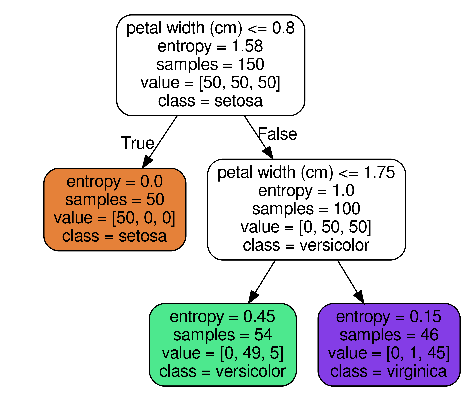

In [19]:
create_tree_image(dt)

## Как строить?

- Найдём признак, разбиение по которому на 2 подгруппы будет наилучшим.
- Повторим для каждой из групп
- Остановимся, когда улучшение будет "небольшим"

## Наилучшим?

Формула энтропии:
$$S = - \sum\limits_{i=1}^{K} p_i \log_2 p_i $$
Прирост информации:
$$ IG = S_{O} - \sum\limits_{i=1}^{q}\frac{N_i}{N}S_i$$


Выбираем признак с наилучшим приростом информации. Альтернатива - критерий Джини.

## Параметры

Загрузим датасет. Цель - определить, зарабатывает ли человек больше 50К

In [20]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

--2019-10-27 18:21:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3,8M) [application/x-httpd-php]
Saving to: ‘adult.data.1’

adult.data.1        100%[===================>]   3,79M   322KB/s    in 13s     

2019-10-27 18:21:34 (308 KB/s) - ‘adult.data.1’ saved [3974305/3974305]

--2019-10-27 18:21:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2003153 (1,9M) [application/x-httpd-php]
Saving to: ‘adult.test.1’

adult.test.1        100%[===================>]   1,91M   233KB/s    in 9,0s    


In [21]:
ind = np.array([2, 4, 10, 11, 12, 14])
df = pd.read_csv('adult.data', header=-1, usecols=ind)
df.head()

,2,4,10,11,12,14
0,77516,13,2174,0,40,<=50K
1,83311,13,0,0,13,<=50K
2,215646,9,0,0,40,<=50K
3,234721,7,0,0,40,<=50K
4,338409,13,0,0,40,<=50K


In [22]:
X_train, y_train = df.values[:, :-1], df.values[:, -1] == " >50K"

In [23]:
test_df = pd.read_csv('adult.test', skiprows=1, header=-1, usecols=ind)
test_df.head()

,2,4,10,11,12,14
0,226802,7,0,0,40,<=50K.
1,89814,9,0,0,50,<=50K.
2,336951,12,0,0,40,>50K.
3,160323,10,7688,0,40,>50K.
4,103497,10,0,0,30,<=50K.


In [24]:
X_test, y_test = test_df.values[:, :-1], test_df.values[:, -1] == " >50K."

Обучим классификатор с параметрами по умолчанию

In [25]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Поскольку количество примеров на каждый класс сильно отличается, accuracy использовать нельзя. Будем использовать roc_auc_score

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
roc_auc_score(y_test, dt.predict(X_test))

0.6723441772411548

Попробуем поменять критерий разбиения:

In [28]:
dt = DecisionTreeClassifier(random_state=0, criterion='entropy')
dt.fit(X_train, y_train)
roc_auc_score(y_test, dt.predict(X_test))

0.6747982175016796

splitter:

In [29]:
dt = DecisionTreeClassifier(random_state=0, criterion='entropy', splitter='random')
dt.fit(X_train, y_train)
roc_auc_score(y_test, dt.predict(X_test))

0.6703860072376356

min_samples_split:

In [30]:
dt = DecisionTreeClassifier(random_state=0, criterion='entropy', min_samples_split=0.1)
dt.fit(X_train, y_train)
roc_auc_score(y_test, dt.predict(X_test))

0.6855257949763105

class_weight:

In [31]:
dt = DecisionTreeClassifier(
    random_state=0, criterion='entropy', min_samples_split=0.1, class_weight='balanced')
dt.fit(X_train, y_train)
roc_auc_score(y_test, dt.predict(X_test))

0.725352676350721

И другие...

# Полезные ссылки

- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [ROC AUC](https://dyakonov.org/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/)

## Источники материалов
* [mlcourse.ai](https://github.com/Yorko/mlcourse.ai) - курс Машинного обучения с OpenDataScience
* [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)